#Week4 

This weeek's tutorial provides an introduction into **regression**.

In [1]:
## to view 3D scatterplots in a new window (and be able to rotate the plot),
## restart this notebook, comment the next line, uncomment the following one and then run this cell
%pylab inline
#from pylab import *

import random
import numpy as np
import matplotlib.pyplot as pl


Populating the interactive namespace from numpy and matplotlib


In [2]:
def poly_data_make(sampling="sparse", deg=3, n=21):
    """
    Create an artificial dataset
    """
    np.random.seed(0)

    if sampling == "irregular":
        xtrain = np.concatenate(
            (np.arange(-1, -0.5, 0.1), np.arange(3, 3.5, 0.1)))
    elif sampling == "sparse":
        xtrain = np.array([-3, -2, 0, 2, 3])
    elif sampling == "dense":
        xtrain = np.arange(-5, 5, 0.6)
    elif sampling == "thibaux":
        xtrain = np.linspace(0, 20, n)
        xtest = np.arange(0, 20, 0.1)
        sigma2 = 4
        w = np.array([-1.5, 1/9.])
        fun = lambda x: w[0]*x + w[1]*np.square(x)

    if sampling != "thibaux":
        assert deg < 4, "bad degree, dude %d" % deg
        xtest = np.arange(-7, 7, 0.1)
        if deg == 2:
            fun = lambda x: (10 + x + np.square(x))
        else:
            fun = lambda x: (10 + x + np.power(x, 3))
        sigma2 = np.square(5)

    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytestNoisefree = fun(xtest)
    ytestNoisy = ytestNoisefree + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)

    return xtrain, ytrain, xtest, ytestNoisefree, ytestNoisy, sigma2 

Example of using the above function:

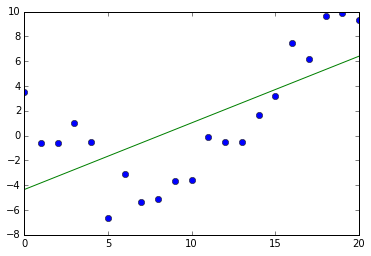

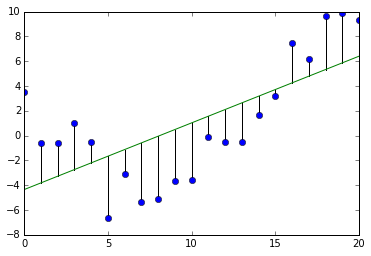

In [3]:
N = 21
x, y, _, _, _, _ = poly_data_make(sampling='thibaux', n=N)
X = np.concatenate((np.ones((N,1)), x.reshape(N,1)), axis=1)  


w = np.linalg.lstsq(X, y)[0]
y_estim = np.dot(X,w)

pl.plot(X[:,1], y, 'o')
pl.plot(X[:,1], y_estim, '-')
pl.savefig('linregResidualsNoBars.png')
pl.show()

for x0, y0, y_hat in zip(X[:,1], y, y_estim):
  pl.plot([x0, x0],[y0, y_hat],'k-')
pl.plot(X[:,1], y, 'o')
pl.plot(X[:,1], y_estim, '-')

(21, 2)
Coefficients:  [ 0.          0.53773872]
Residual sum of squares: 0.00
Variance score: 1.00


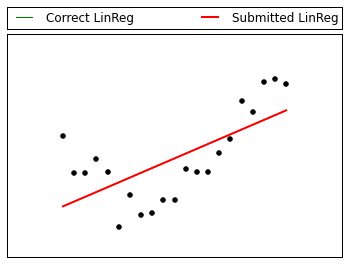

In [51]:
def check_fit_plot_2d(xtrain,ytrain,xtest,ytest,regressionType = 'linear',alpha = 0.1):
    '''
    
    Checks how well a model performs linear regression
    Comparison is done with *scikit-learn linear_model.LinearRegression()*
    
    Parameters: 
      - numpy.array() of shape (_L,):
        xtrain - training samples 
        ytrain - training labels
        xtest  - test samples
        ytest  - of test labels
      - string:
        regressionType - can be : linear, ridge or bayesian
      - float:
        alpha - control regularization. if not specified default is 0.1
        
    
    Output:
        None
    Plot:
        Plots the sscatterred samples and the regression lines:
            - green line : output from sciikit learn
            - red line   : output from the inputed labels
    '''
    Xtrain1 = np.concatenate((np.ones((len(xtrain),1)), xtrain.reshape(len(xtrain),1)), axis=1)
    print (Xtrain1.shape)
    Xtest = np.concatenate((np.ones((len(xtest),1)), xtest.reshape(len(xtest),1)), axis=1)
    
    ### Use scikitlea-rn to do linear regression
    from sklearn import linear_model
   
    # Create linear regression object
    if regressionType == 'linear':
        regr = linear_model.LinearRegression()
    else:
        if regressionType == 'ridge':
            regr = linear_model.Ridge(alpha = alpha)
        else:
            regr = linear_model.BayesianRidge()
    
        

    # Train the model using the training sets
    regr.fit(Xtrain1, ytrain)

    # The coefficients
    print('Coefficients: ', regr.coef_)
    # The mean square error
    print("Residual sum of squares: %.2f"
          % np.mean((regr.predict(Xtest) - ytest) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(Xtest, ytest))

    # Plot outputs
    plt.scatter(Xtrain1[:,1], ytrain,  color='black')
    plt.plot(Xtest[:,1], regr.predict(Xtest), color='green',linewidth=1, label='Correct LinReg')
    plt.plot(Xtest[:,1], ytest, color='red',linewidth=2,label='Submitted LinReg')

    plt.xticks(())
    plt.yticks(())
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

    plt.show()

#Test function check_fit_plot
check_fit_plot_2d(x,y,x,y_estim)

##What you should know before solving the challenges:
- Linear regression
		Model
		MLE
		Geometric  interpretation
		Robust linear regression
		Ridge regression
- Linear basis function models
- Bias-variance decomposition
- Bayesian regression

####How to use this notebook.
- After each challenge you can use the provided starter code to write and asses your solution. 
- A combination of code cells and markdown cells are allowed for each answer. For example: test whether smth is smth should be accompanied by code demonstrating that but for free answers markdown cells are recomended.


#Challenges

###1. Evaluating Data for linearity

- Consider the following data :

 $Y  = [16, 4, 1, 9, 1, 25, 16, 4, 0, 9, 25]$
 
 $X  = [-4, -2, 1, 3, -1, -5, 4, 2, 0, -3, 5]$
 
  - Examine the scatter plot of Y versus X. Is there a relationship between Y and X ?
  - What is the estimated linear regression equation relating Y to X ?
  - Test the hypothesis that the slope equals 0.
  - Despite the outcome of the test in part c, does there appear to be a “strong” or “weak” association between X and Y ? Express this association in the form of an equation.

(11, 2)
Coefficients:  [ 0.        -0.0005078]
Residual sum of squares: 78.00
Variance score: 0.00


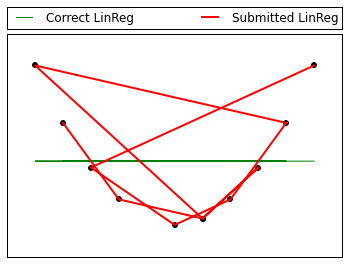

In [58]:
X = np.array([-4,-2,1,3,1,-5,4,2,0,-3,5])
Y = np.array([16,4,1,9,1,25,16,4,0,9,25])

plt.scatter(X, Y)
check_fit_plot_2d(X, Y, X, Y, 0.0) # we'll just look at the green one for the linear regression estimate ^^

# scikit seems to produce a 0-slope line, although I expected that it would lean slightly to the right due to 
# the asymmetry in the training data. Should figure that out.

#Y is perfectly determined by X, Y = X ^ 2.


###2.  Regression fitting with regularization

- Implement Polynomial Fitting with Linear Regression with L2-Regularization. Your function should take 4 parameters:
  - A training file : comma separated values found in this repo
  - A testing file : comma separated values found in this repo
  - The number of parameters : the degree of the polynomial to fit
  - A $\lambda$ value : the regularization penalty.

- Your code should:
     - train a regularized linear regression model using the training data, 
     - evaluate the model on the training data, and 
     - evaluate the model on the testing data.
- The training and testing data files are comma separated valued plain text files containing one data point per row.  The format is 
        x,t
        x,t
        x,t
        etc.
- Your code should output the training (mean squared) error and the testing (mean squared) error, in that order separated by a comma and ended by a new line.  Your code should not produce any other information if it runs correctly.  If there is an error, your code may report error information like \-4 is not a valid value for lambda".
- You are **NOT** allowed to use *scikit's linear_model* or any library that has linear regression already implemented.
- You are allowed to use the numpy package, but are **not** allowed to use the *numpy.linalg.lstq*[1] function. 
 
[1]http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html

[[ 0.61780714]],[[ 0.58810817]]
(10, 2)
Coefficients:  [ 0.         -1.41003665]
Residual sum of squares: -1.50
Variance score: 0.62


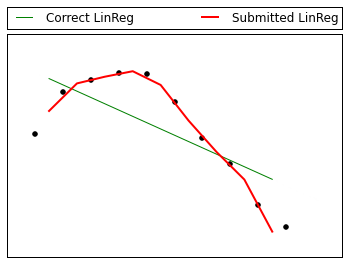

In [64]:
def augmentMatrix(X): # don't think we need this for polynomial fitting (phi[:, 0] is already full of ones)
    n = len(X)
    return np.hstack((n * [[1]], X))

def makeFeatureMatrix(x, degree):
    return np.matrix([[entry ** d for d in range(degree + 1)] for entry in x])

def MSE(phi, y, w):
    results = np.matrix(phi * w)
    n = len(phi)
    return np.transpose(results) * results / n

def LinearRegression(training_file, test_file, pol_degree, lambda_):
    train_data = numpy.loadtxt(open(training_file,"rb"),delimiter=",",skiprows=1)
    test_data = numpy.loadtxt(open(test_file,"rb"),delimiter=",",skiprows=1)
    
    x_train = train_data[:, 0]
    y_train = train_data[:, 1]
    
    x_test = test_data[:, 0]
    y_test = test_data[:, 1]
    
    phi_train = makeFeatureMatrix(x_train, pol_degree)
    phi_test = makeFeatureMatrix(x_test, pol_degree)
    
    m = len(phi_train[0])
    
    w = np.linalg.inv(np.diag(lambda_ * np.ones(m)) + (np.transpose(phi_train) * phi_train))
    w = w * np.transpose(phi_train)
    w = w * np.transpose(np.matrix(y_train))
    
    print(str(MSE(phi_train, y_train, w)) + "," + str(MSE(phi_test, y_test, w)))
    check_fit_plot_2d(x_train, y_train, x_test, phi_test * w, lambda_)
    
LinearRegression('training-linreg.csv','testing-linreg.csv',8, 0.1)

 - **Hint:** You can use *check_fit_plot_2D* function to see how your model compares to scikit-learn's model for linear regression

###3. Bayesian Linear Regression

- Exercise 7.8 (a-b)(ML: A probabilistic perspective): Bayesian linear regression in 1D with known $σ^2$
  - Consider fitting a model of the form $p(y|x, θ) = \mathcal{N}(y|w_0 + w_1*x, σ^2)$ to the data shown below.
   - a) Compute an unbiased estimate of $\sigma^2$ using
    
        $\hat{\sigma}^2 = \frac{1}{N-2}*\sum_{i=1}^{N} (y_i - \hat{y_i})^2$
        
       (The denominator is $N-2$ since we have 2 inputs, namely the offset term and $x$.) Here $\hat{y_i} = \hat{w_0} + \hat{w_1}*x_i$ and $\hat{\text{w}} = (\hat{w_0},\hat{w_1})$ is the MLE.
        
   - b) Now assume the following prior on w:
    
        $p(\text{w}) = p(w_0)p(w_1)$
    
       Use an (improper) uniform prior on $w_0$ and a $\mathcal{N}(0,1)$ prior on $w_1$. Show that this can be written as a Gaussian prior of the form $p(w_0) = \mathcal{N}(w|w_0,V_0)$. What are $w_0$ and $V_0$ ?

In [60]:
x_bayes = np.array([94,96,94,95,104,106,108,113,115,121,131])
y_bayes = np.array([0.47, 0.75, 0.83, 0.98, 1.18, 1.29, 1.40, 1.60, 1.75, 1.90, 2.23])

- **Hint**: You can use *check_fit_plot_2D* function to see how your model compares to scikit-learn's model for linear regression

###4. Theoretical exercices

- Try solving the following exercices:
  - Exercise 7.7(a-d) from *Machine Learning - A probabilistic perspective* (poly_data_make is defined above if you want to tackle subpoint f)
  - Exercise 3.5 from *Pattern Recognition and Machine Learning*

###5. AAAAAAAAND DONE!

In [ ]:
print "All is well in the world!"

###Bonus

- Not this week, unless you want to do the rest of the exercises from the above mentioned chapters.